In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime
import numpy as np



In [2]:
def load_all_data():
    files = glob.glob("tsa_passengers_*.csv")
    all_data = []
    
    for file in files:
        year = int(file.split("_")[2].split(".")[0])
        df = pd.read_csv(file, parse_dates=["Date"])
        df["Year"] = year
        all_data.append(df)
    
    return pd.concat(all_data, ignore_index=True)

df = load_all_data()
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["DayName"] = df["Date"].dt.day_name()

## Recent Years Comparison

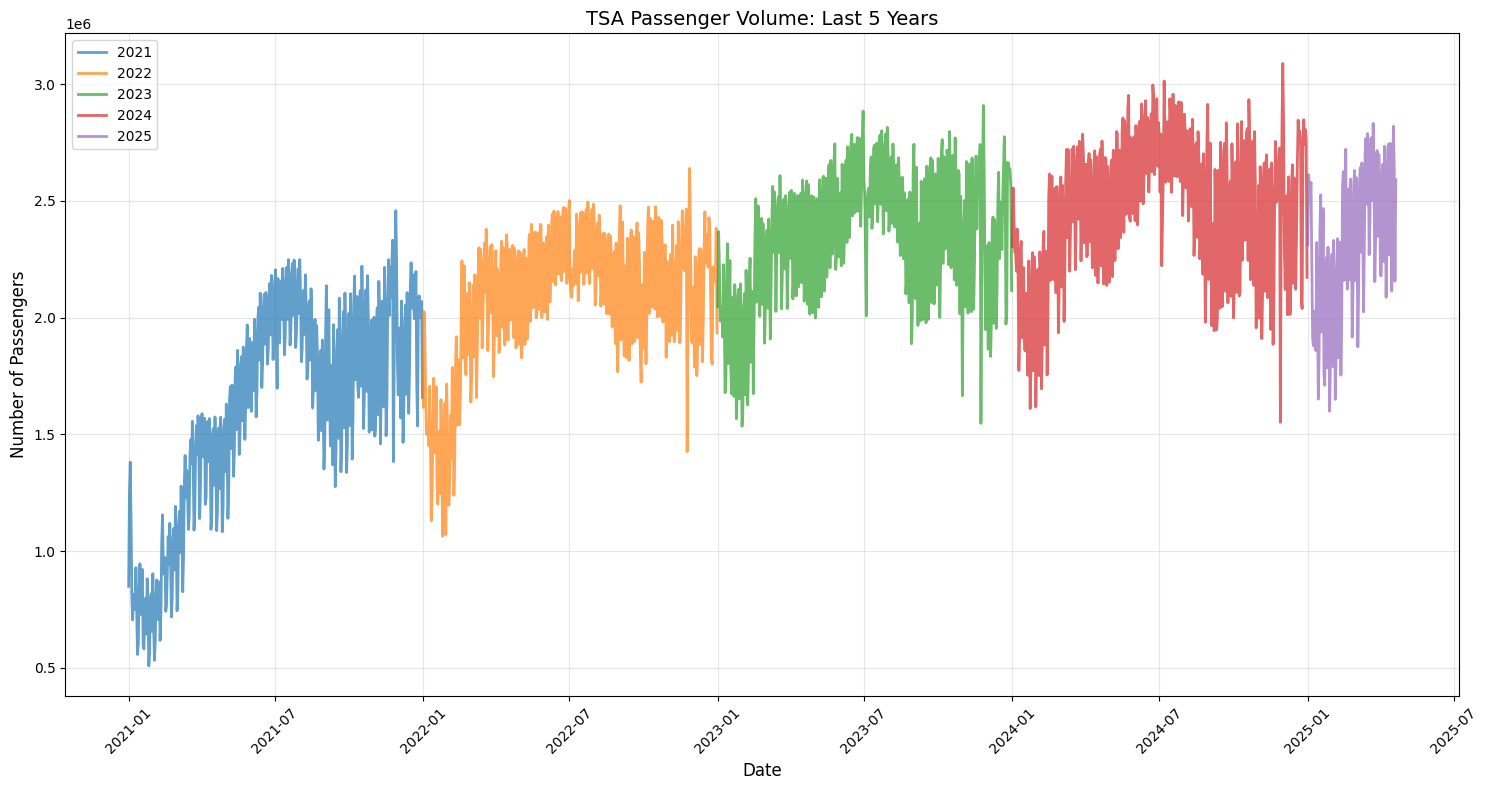

In [3]:
recent_years = sorted(df["Year"].unique())[-5:]
recent_data = df[df["Year"].isin(recent_years)]

plt.figure(figsize=(15, 8))
for year in recent_years:
    year_data = recent_data[recent_data["Year"] == year]
    plt.plot(year_data["Date"], year_data["Passengers"], 
             label=str(year), alpha=0.7, linewidth=2)

plt.title("TSA Passenger Volume: Last 5 Years", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Monthly Comparison

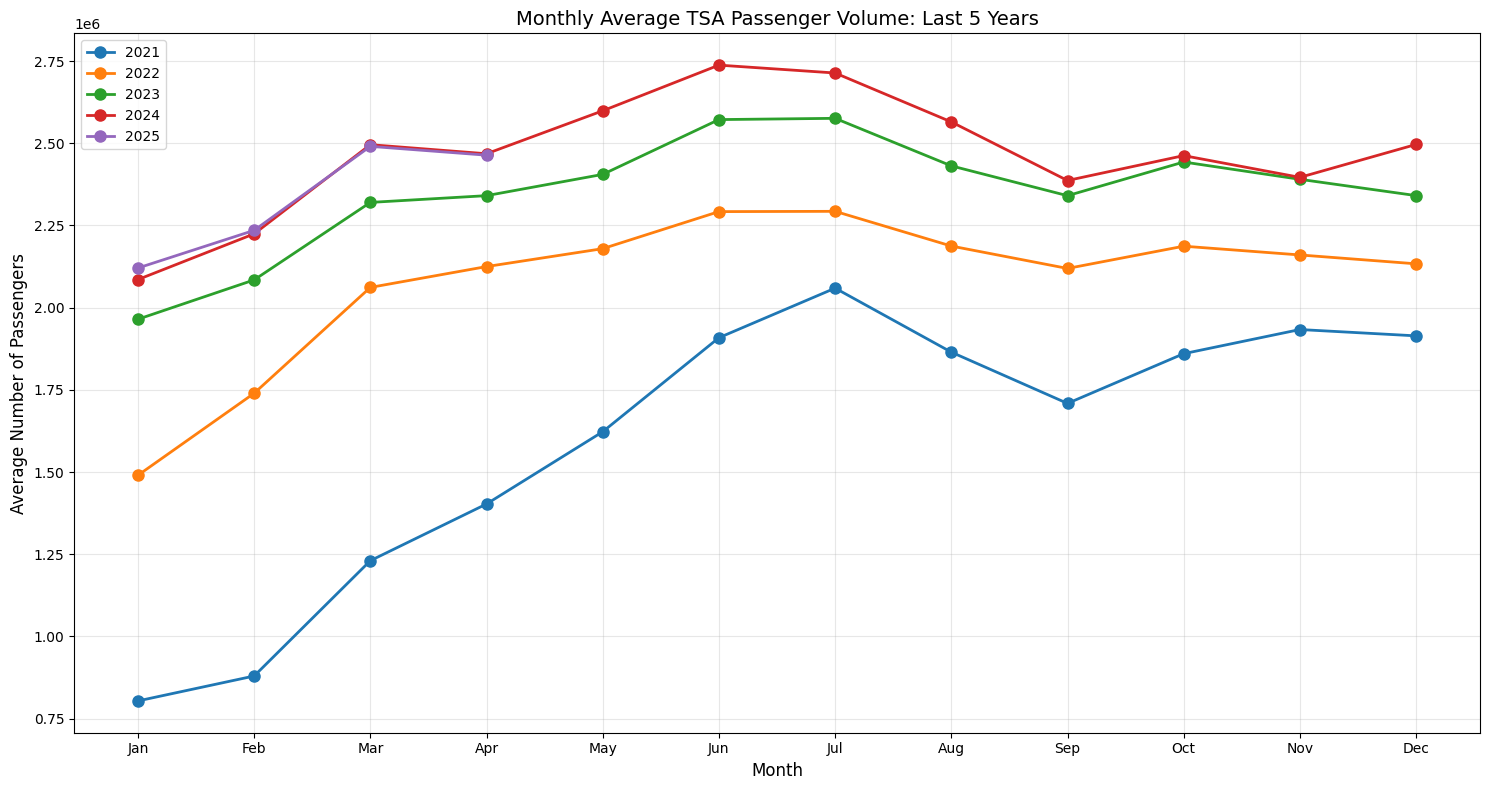

In [4]:
monthly_avg = recent_data.groupby(["Year", "Month"])["Passengers"].mean().reset_index()

plt.figure(figsize=(15, 8))
for year in recent_years:
    year_data = monthly_avg[monthly_avg["Year"] == year]
    plt.plot(year_data["Month"], year_data["Passengers"], 
             label=str(year), marker="o", linewidth=2, markersize=8)

plt.title("Monthly Average TSA Passenger Volume: Last 5 Years", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Number of Passengers", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

## Weekly Pattern Comparison

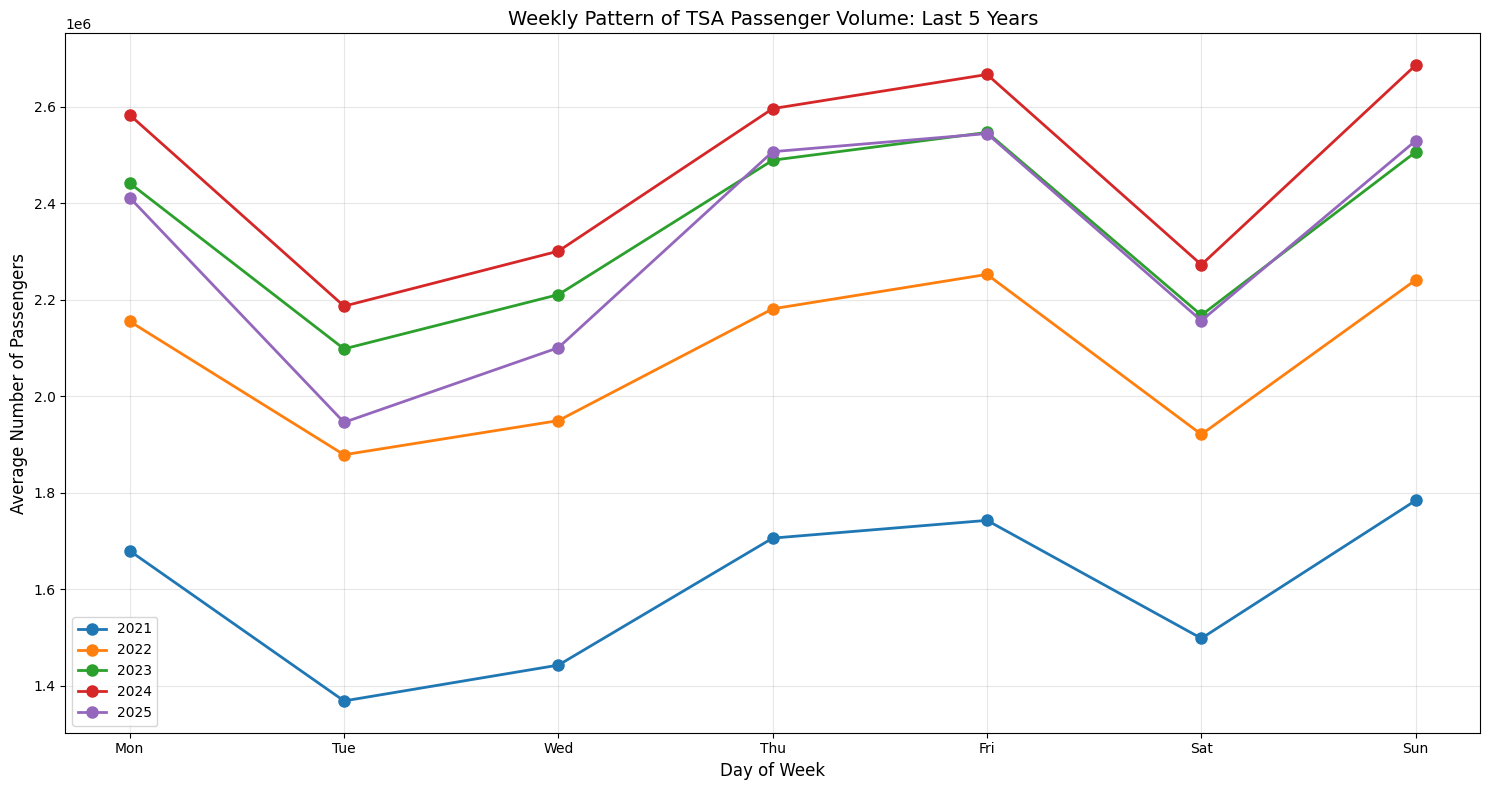

In [5]:
weekly_avg = recent_data.groupby(["Year", "DayOfWeek"])["Passengers"].mean().reset_index()

plt.figure(figsize=(15, 8))
for year in recent_years:
    year_data = weekly_avg[weekly_avg["Year"] == year]
    plt.plot(year_data["DayOfWeek"], year_data["Passengers"], 
             label=str(year), marker="o", linewidth=2, markersize=8)

plt.title("Weekly Pattern of TSA Passenger Volume: Last 5 Years", fontsize=14)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average Number of Passengers", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.tight_layout()
plt.show()

## Year-over-Year Growth

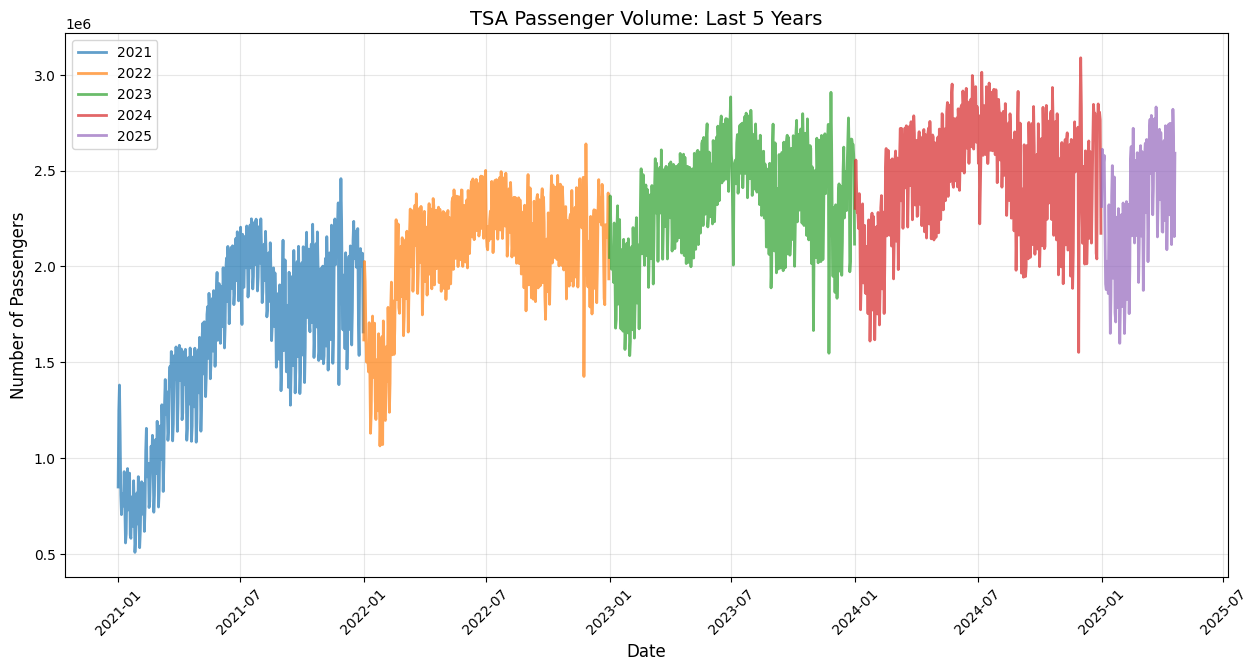

In [8]:
recent_years = sorted(df["Year"].unique())[-5:]
recent_data = df[df["Year"].isin(recent_years)]

plt.figure(figsize=(15, 8))
for year in recent_years:
    year_data = recent_data[recent_data["Year"] == year]
    plt.plot(year_data["Date"], year_data["Passengers"], 
             label=str(year), alpha=0.7, linewidth=2)

plt.title("TSA Passenger Volume: Last 5 Years", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)  # Add more space at bottom for rotated labels
plt.show()